## Introduction

In [1]:
from IPython.display import HTML

HTML('''<script>
  function code_toggle() {
    if (code_shown){
      $('div.input').hide('500');
      $('#toggleButton').val('Show Code')
    } else {
      $('div.input').show('500');
      $('#toggleButton').val('Hide Code')
    }
    code_shown = !code_shown
  }

  $( document ).ready(function(){
    code_shown=false;
    $('div.input').hide()
  });
</script>
<form action="javascript:code_toggle()"><input type="submit" id="toggleButton" value="Show Code"></form>''')

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.ticker as mtick
import seaborn as sns
from sklearn.preprocessing import scale
from statsmodels.nonparametric.kde import KDEUnivariate
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, f1_score, precision_score, recall_score, roc_auc_score
from sklearn.neighbors import KNeighborsClassifier 
from sklearn.ensemble import RandomForestClassifier
%matplotlib inline
sns.set_palette('cubehelix')

def inference(inference_str):
    print('\033[1m'+"Inference: " + '\033[0m')
    print(inference_str)

def bold(any_str):
    print('\033[1m'+ any_str + '\033[0m')    
    
bold("Used version 0.20.0 of sklearn, therefore used model_selection instead of cross_validation")

Used version 0.20.0 of sklearn, therefore used model_selection instead of cross_validation


## Collecting Data 

In [3]:
#Import Data and Data Overview.
df = pd.read_csv('WA_Fn-UseC_-Telco-Customer-Churn.csv')
bold("Rows, columns")
print(df.shape) #Number of rows and Columns
bold("All Column names.")
print(df.columns.tolist())


Rows, columns
(7043, 21)
All Column names.
['customerID', 'gender', 'SeniorCitizen', 'Partner', 'Dependents', 'tenure', 'PhoneService', 'MultipleLines', 'InternetService', 'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling', 'PaymentMethod', 'MonthlyCharges', 'TotalCharges', 'Churn']


In [4]:
#target column/outcome variable: 'Churn'
bold("Target column")
print(df['Churn'].value_counts())

Target column
No     5174
Yes    1869
Name: Churn, dtype: int64


## Exploratory Data Analysis

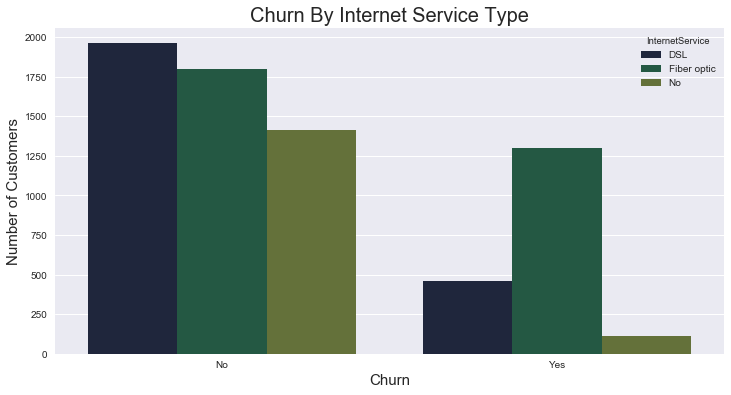

In [5]:
plt.figure(figsize=(12,6))
axis = sns.countplot(x="Churn", hue="InternetService", data=df);
axis.set_ylabel('Number of Customers', fontsize = 15)
axis.set_xlabel('Churn', fontsize = 15)
axis.set_title('Churn By Internet Service Type', fontsize=20)

In [6]:
inference("Customers with Fibre Optic Internet Service provider has highest churn")

Inference: 
Customers with Fibre Optic Internet Service provider has highest churn


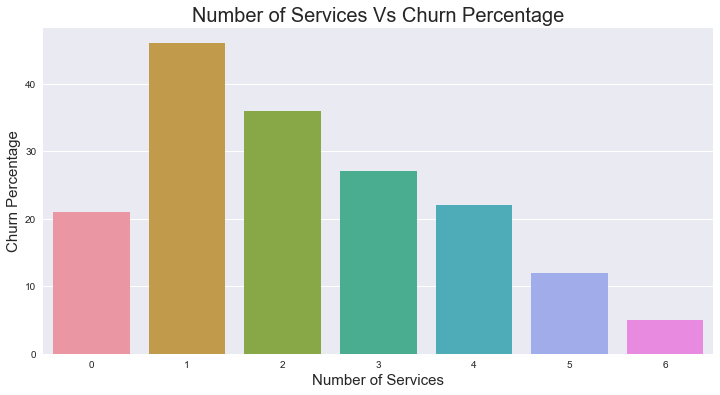

In [7]:
df['value_added_Services'] = (df[['OnlineSecurity', 'DeviceProtection', 'StreamingMovies', 'TechSupport', 'StreamingTV', 'OnlineBackup']] == 'Yes').sum(axis=1)
aggregate = df.replace('Yes', 1).replace('No', 0).groupby('value_added_Services', as_index=False)[['Churn']].mean()
aggregate[['Churn']] = np.round(aggregate[['Churn']], 2) * 100
plt.figure(figsize=(12,6))
ax = sns.barplot(x='value_added_Services', y='Churn', data=aggregate)
ax.set_xlabel('Number of Services', fontsize=15)
ax.set_ylabel('Churn Percentage', fontsize=15)
ax.set_title('Number of Services Vs Churn Percentage', fontsize=20)

In [8]:
inference("Customers who availed just one service among all the six provided services('OnlineSecurity', 'DeviceProtection', 'StreamingMovies', 'TechSupport', 'StreamingTV', 'OnlineBackup') has maximum churn percentage of 48%.")

Inference: 
Customers who availed just one service among all the six provided services('OnlineSecurity', 'DeviceProtection', 'StreamingMovies', 'TechSupport', 'StreamingTV', 'OnlineBackup') has maximum churn percentage of 48%.


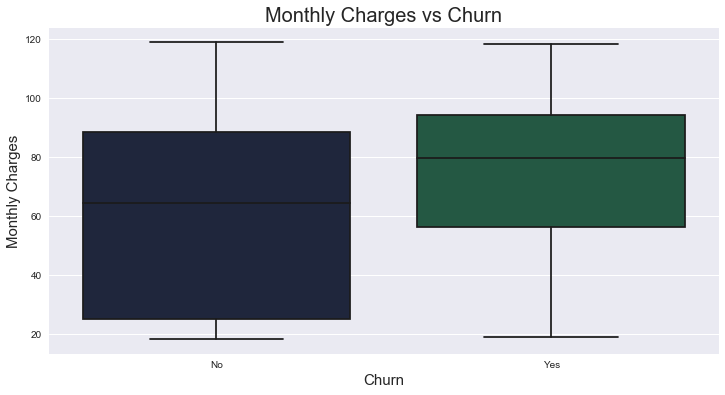

In [9]:
plt.figure(figsize=(12,6))
ax = sns.boxplot(x='Churn', y='MonthlyCharges', data=df)
ax.set_title('Monthly Charges vs Churn', fontsize=20)
ax.set_ylabel('Monthly Charges', fontsize=15)
ax.set_xlabel('Churn', fontsize=15)

In [10]:

inference("Average Monthly Charge of Churning customers is 80.")

Inference: 
Average Monthly Charge of Churning customers is 80.


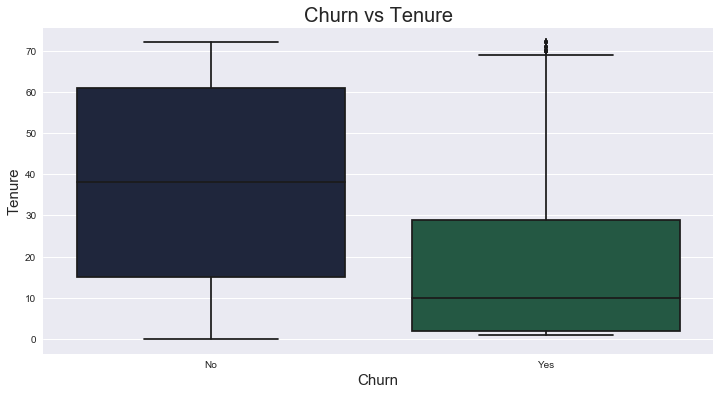

In [11]:
plt.figure(figsize=(12,6))
ax = sns.boxplot(x='Churn', y = 'tenure', data=df)
ax.set_title('Churn vs Tenure', fontsize=20)
ax.set_ylabel('Tenure', fontsize = 15)
ax.set_xlabel('Churn', fontsize = 15)

In [12]:
inference("Average Tenure of Churning customers is 10 months.")


Inference: 
Average Tenure of Churning customers is 10 months.


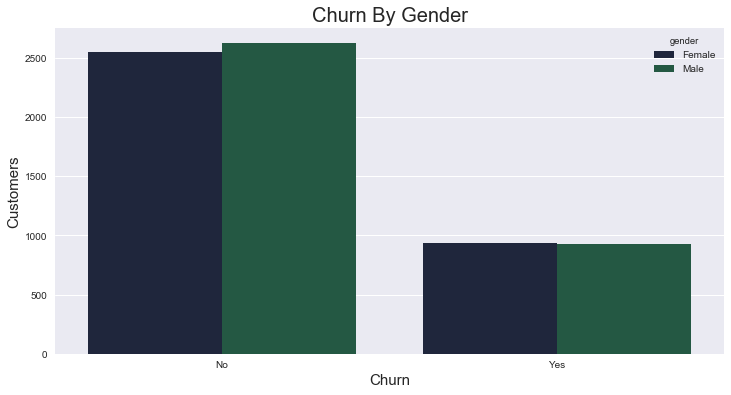

In [13]:
plt.figure(figsize=(12,6))
axis = sns.countplot(x="Churn", hue="gender", data=df);
axis.set_ylabel('Customers', fontsize = 15)
axis.set_xlabel('Churn', fontsize = 15)

axis.set_title('Churn By Gender', fontsize=20)

In [14]:
inference("Gender has no effect on churn")

Inference: 
Gender has no effect on churn


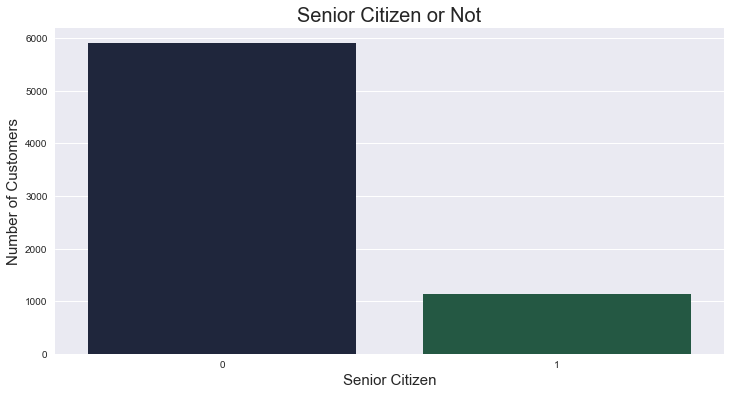

In [15]:
plt.figure(figsize=(12,6))
axis = sns.countplot(x="SeniorCitizen", data=df);
axis.set_ylabel('Number of Customers', fontsize=15)
axis.set_xlabel('Senior Citizen', fontsize=15)

axis.set_title('Senior Citizen or Not', fontsize=20)

In [16]:
inference("Senior Citizen tends to churn less as compared to non-senior citizen.")

Inference: 
Senior Citizen tends to churn less as compared to non-senior citizen.


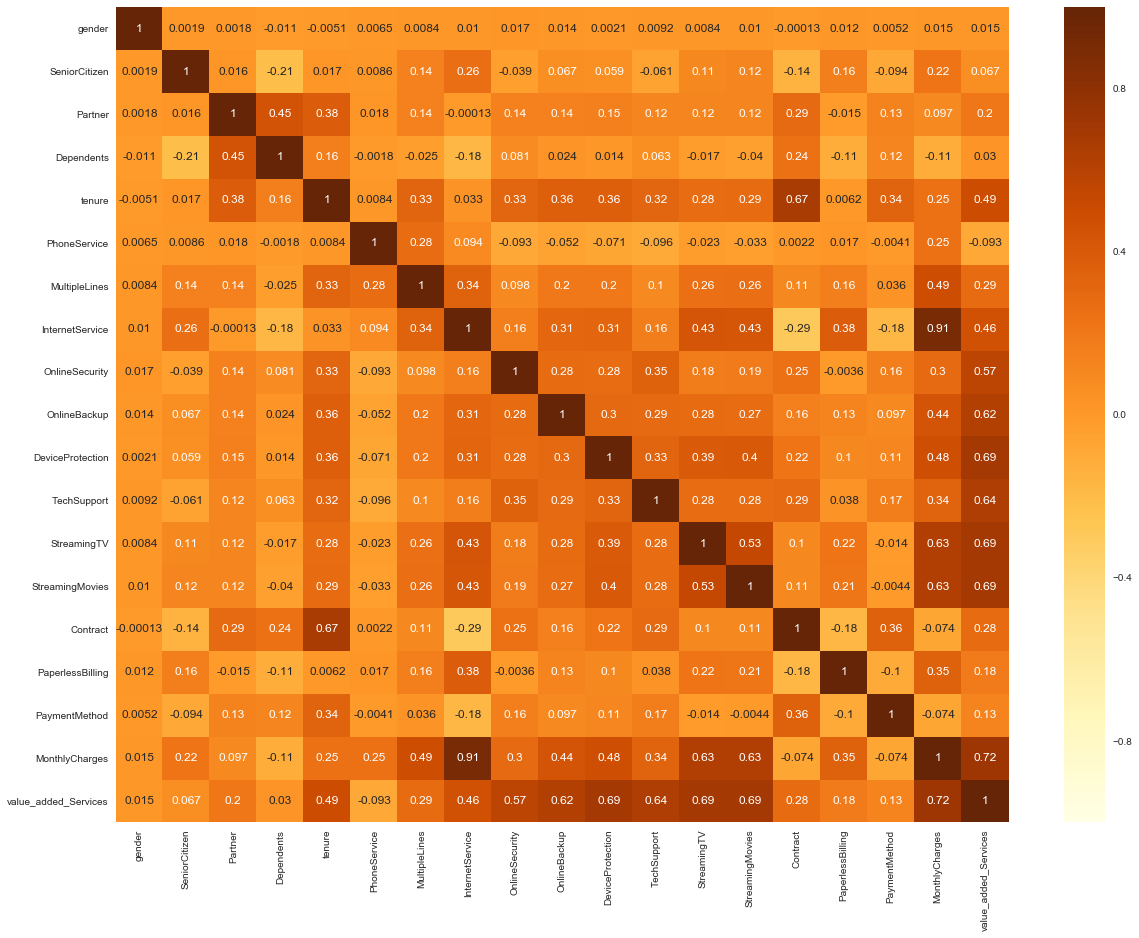

In [17]:


df['gender'].replace(['Male','Female'],[0,1],inplace=True)
df['Partner'].replace(['Yes','No'],[1,0],inplace=True)
df['Dependents'].replace(['Yes','No'],[1,0],inplace=True)
df['PhoneService'].replace(['Yes','No'],[1,0],inplace=True)
df['MultipleLines'].replace(['No phone service','No', 'Yes'],[0,0,1],inplace=True)
df['InternetService'].replace(['No','DSL','Fiber optic'],[0,1,2],inplace=True)
df['OnlineSecurity'].replace(['No','Yes','No internet service'],[0,1,0],inplace=True)
df['OnlineBackup'].replace(['No','Yes','No internet service'],[0,1,0],inplace=True)
df['DeviceProtection'].replace(['No','Yes','No internet service'],[0,1,0],inplace=True)
df['TechSupport'].replace(['No','Yes','No internet service'],[0,1,0],inplace=True)
df['StreamingTV'].replace(['No','Yes','No internet service'],[0,1,0],inplace=True)
df['StreamingMovies'].replace(['No','Yes','No internet service'],[0,1,0],inplace=True)
df['Contract'].replace(['Month-to-month', 'One year', 'Two year'],[0,1,2],inplace=True)
df['PaperlessBilling'].replace(['Yes','No'],[1,0],inplace=True)
df['PaymentMethod'].replace(['Electronic check', 'Mailed check', 'Bank transfer (automatic)','Credit card (automatic)'],[0,1,2,3],inplace=True)
# df['Churn'].replace(['Yes','No'],[1,0],inplace=True)
#df.info()
corr = df.corr()
sns.heatmap(corr, xticklabels=corr.columns.values, yticklabels=corr.columns.values, annot = True, annot_kws={'size':12},cmap="YlOrBr")
heat_map=plt.gcf()
heat_map.set_size_inches(20,15)
plt.xticks(fontsize=10)
plt.yticks(fontsize=10)
plt.show()


In [18]:
inference("1) Customers with longer contract tends to stay for longer tenure. \n2) Monthly charges depends heavily on all internet services. \n3) Senior citizen tends to not go for contract.")

Inference: 
1) Customers with longer contract tends to stay for longer tenure. 
2) Monthly charges depends heavily on all internet services. 
3) Senior citizen tends to not go for contract.


## Data Preprocessing and Cleaning

In [19]:
#Convert categorical target variable to numeric.

df['Churn'] = [0 if x == 'No' else 1 for x in df['Churn']]

In [20]:
#Tenure to categorical column
def apply_tenure(df) :
    
    if df["tenure"] <= 12 :
        return "Lessthan_OneYear"
    elif (df["tenure"] > 12) & (df["tenure"] <= 24 ):
        return "Between_One_TwoYear"
    elif (df["tenure"] > 24) & (df["tenure"] <= 36) :
        return "Between_Two_ThreeYear"
    elif (df["tenure"] > 36) & (df["tenure"] <= 48):
         return "Between_Three_FourYear"
    elif (df["tenure"] > 48) & (df["tenure"] <= 60) :
         return "Between_Four_FiveYear"
    elif df["tenure"] > 60 :
         return "Morethan_FiveYears"
df["tenure_group"] = df.apply(lambda df:apply_tenure(df),
                                      axis = 1)
#print(df['tenure_group'])

In [21]:
df.drop('customerID',axis=1, inplace=True)

In [22]:
#convert column TotalCharges to Numeric type
df = df[df['TotalCharges'] != " "]
df['TotalCharges'] = pd.to_numeric(df['TotalCharges'])

In [23]:
X = df.drop('Churn', 1)
y = df.Churn

In [24]:
bold("Frist 5 rows in X.")
print(X.head(5))

Frist 5 rows in X.
   gender  SeniorCitizen  Partner  Dependents  tenure  PhoneService  \
0       1              0        1           0       1             0   
1       0              0        0           0      34             1   
2       0              0        0           0       2             1   
3       0              0        0           0      45             0   
4       1              0        0           0       2             1   

   MultipleLines  InternetService  OnlineSecurity  OnlineBackup  \
0              0                1               0             1   
1              0                1               1             0   
2              0                1               1             1   
3              0                1               1             0   
4              0                2               0             0   

            ...            TechSupport  StreamingTV  StreamingMovies  \
0           ...                      0            0                0   
1      

In [25]:
bold("First 5 rows in y.") 
print(y.head(5))

First 5 rows in y.
0    0
1    0
2    1
3    0
4    1
Name: Churn, dtype: int64


#### Check Missing Values

In [26]:
bold("Missing values for each column in dataset.")
X.isnull().sum().sort_values(ascending=False)

Missing values for each column in dataset.


tenure_group            0
OnlineBackup            0
SeniorCitizen           0
Partner                 0
Dependents              0
tenure                  0
PhoneService            0
MultipleLines           0
InternetService         0
OnlineSecurity          0
DeviceProtection        0
value_added_Services    0
TechSupport             0
StreamingTV             0
StreamingMovies         0
Contract                0
PaperlessBilling        0
PaymentMethod           0
MonthlyCharges          0
TotalCharges            0
gender                  0
dtype: int64

In [27]:
# Decide which categorical variables you want to use in model
dummy_list=[]
for col_name in X.columns:
    if X[col_name].dtypes == 'object':
        if col_name != "MonthlyCharges" and col_name != "TotalCharges":
            dummy_list.append(col_name)
        unique_cat = len(X[col_name].unique())
        
#print(X['TotalCharges'].dtypes)

In [28]:
def dummy_df(df,dummy_list):
    for x in dummy_list:
        dummies = pd.get_dummies(df[x], prefix=x, dummy_na=False)
        df = df.drop(x, 1)
        df = pd.concat([df, dummies], axis=1)
    return df

In [29]:
X = dummy_df(X,dummy_list)
X.shape
bold("First 5 rows after get_dummies.")
print(X.head(5))

First 5 rows after get_dummies.
   gender  SeniorCitizen  Partner  Dependents  tenure  PhoneService  \
0       1              0        1           0       1             0   
1       0              0        0           0      34             1   
2       0              0        0           0       2             1   
3       0              0        0           0      45             0   
4       1              0        0           0       2             1   

   MultipleLines  InternetService  OnlineSecurity  OnlineBackup  \
0              0                1               0             1   
1              0                1               1             0   
2              0                1               1             1   
3              0                1               1             0   
4              0                2               0             0   

                ...                 PaymentMethod  MonthlyCharges  \
0               ...                             0           29.85   


In [30]:
def find_outliers_kde(x):
    x_scaled = scale(list(map(float, x)))
    kde = KDEUnivariate(x_scaled)
    kde.fit(bw="scott", fft=True)
    pred = kde.evaluate(x_scaled)
    
    n = sum(pred < 0.05)
    outlier_ind = np.asarray(pred).argsort()[:n]
    outlier_value = np.asarray(x)[outlier_ind]

    return outlier_ind, outlier_value

In [31]:
kde_indices, kde_values = find_outliers_kde(X['MonthlyCharges'])
bold("Outliers.")
print(np.sort(kde_values))

/Users/safalmehta/anaconda/lib/python3.6/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


Outliers.
[]


In [32]:
inference("no outliers in the data")

Inference: 
no outliers in the data


In [33]:
# The total number of features have grown substantially after dummying and adding interaction terms
bold("Total number of features after dummying")
print(df.shape)
print(X.shape)

Total number of features after dummying
(7032, 22)
(7032, 26)


### Divide Data into Training(70%) and Test Data(30%)

In [34]:
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.70, random_state=1)

/Users/safalmehta/anaconda/lib/python3.6/site-packages/sklearn/model_selection/_split.py:2179: FutureWarning: From version 0.21, test_size will always complement train_size unless both are specified.
  FutureWarning)


### Feature Engineering

Scale data using StandardScaler


In [35]:
sc = StandardScaler()  
X_train = sc.fit_transform(X_train)  
X_test = sc.transform(X_test) 

/Users/safalmehta/anaconda/lib/python3.6/site-packages/sklearn/preprocessing/data.py:625: DataConversionWarning: Data with input dtype uint8, int64, float64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
/Users/safalmehta/anaconda/lib/python3.6/site-packages/sklearn/base.py:462: DataConversionWarning: Data with input dtype uint8, int64, float64 were all converted to float64 by StandardScaler.
  return self.fit(X, **fit_params).transform(X)
/Users/safalmehta/anaconda/lib/python3.6/site-packages/ipykernel_launcher.py:3: DataConversionWarning: Data with input dtype uint8, int64, float64 were all converted to float64 by StandardScaler.
  This is separate from the ipykernel package so we can avoid doing imports until


In [36]:
def report(model,X_train,X_test,y_train,y_test,name) :
    model.fit(X_train,y_train)
    predictions  = model.predict(X_test)
    accuracy     = accuracy_score(y_test,predictions)
    recall  = recall_score(y_test,predictions)
    precision    = precision_score(y_test,predictions)
    roc_auc      = roc_auc_score(y_test,predictions)
    f1      = f1_score(y_test,predictions) 
    
    report = pd.DataFrame({"Model"           : [name],
                       "accuracy_score"  : [accuracy],
                       "recall_score"    : [recall],
                       "precision"       : [precision],
                       "f1_score"        : [f1],
                       "area_under_curve": [roc_auc],
                      })
    return report 

### LOGISTIC REGRESSION

In [37]:

model = LogisticRegression()
result = model.fit(X_train, y_train)
prediction_test = model.predict(X_test)
logistic_regression_report = report(model, X_train, X_test, y_train, y_test, "Logistic Regression")
bold("Accuracy Score of Logistic Regression %0.4f" % accuracy_score(y_test, prediction_test))
yes_no = ["Yes", "No"]
bold("Confusion_Matrix:")
print(pd.DataFrame(confusion_matrix(y_test, prediction_test), columns=yes_no, index=yes_no))
bold("Classification report:")
print(classification_report(y_test, prediction_test))
inference("From this accuracy score, we can infer that our model has classified 80.47% of the data correctly.\nFrom confusion matrix 1403 were correctly classified as Churn(Yes) called as TRUE POSITIVE, 295 were correctly classified as Unchurn(No) called as TRUE NEGATIVE, 152 were incorrectly classified as unchurn(NO) called as FALSE NEGATIVE. 260 were incorrectly classified as Churn(Yes) called as FALSE POSITIVE. \nWhile recall expresses the ability to find all relevant instances in a dataset, precision expresses the proportion of the data points our model says was relevant actually were relevant. \nf1-score is combination of precision and recall giving appropriate wieghtage to both. Hence, a f1-score of 0.80 for our model proves that we are taking relevant data points as well as relevance of the relevant data points is also appropriate  ")


Accuracy Score of Logistic Regression 0.8047
Confusion_Matrix:
      Yes   No
Yes  1403  152
No    260  295
Classification report:
              precision    recall  f1-score   support

           0       0.84      0.90      0.87      1555
           1       0.66      0.53      0.59       555

   micro avg       0.80      0.80      0.80      2110
   macro avg       0.75      0.72      0.73      2110
weighted avg       0.80      0.80      0.80      2110

Inference: 
From this accuracy score, we can infer that our model has classified 80.47% of the data correctly.
From confusion matrix 1403 were correctly classified as Churn(Yes) called as TRUE POSITIVE, 295 were correctly classified as Unchurn(No) called as TRUE NEGATIVE, 152 were incorrectly classified as unchurn(NO) called as FALSE NEGATIVE. 260 were incorrectly classified as Churn(Yes) called as FALSE POSITIVE. 
While recall expresses the ability to find all relevant instances in a dataset, precision expresses the proportion of the d

/Users/safalmehta/anaconda/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/Users/safalmehta/anaconda/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


### KNN 

In [38]:


def knn_classifier_with_neighbor(n_neighbors):
    classifier = KNeighborsClassifier(n_neighbors)  
    classifier.fit(X_train, y_train)  
    y_pred = classifier.predict(X_test) 
    return accuracy_score(y_test, y_pred)

bold("Accuracies for k ranging from 1 to 22.")
for i in range(1,22):
    print("k_val:{0}, knn:{1}".format(i, knn_classifier_with_neighbor(i)))
    
    

Accuracies for k ranging from 1 to 22.
k_val:1, knn:0.7274881516587678
k_val:2, knn:0.7540284360189573
k_val:3, knn:0.7497630331753554
k_val:4, knn:0.7668246445497631
k_val:5, knn:0.7592417061611374
k_val:6, knn:0.7701421800947867
k_val:7, knn:0.7644549763033175
k_val:8, knn:0.7687203791469195
k_val:9, knn:0.7725118483412322
k_val:10, knn:0.7753554502369668
k_val:11, knn:0.776303317535545
k_val:12, knn:0.7805687203791469
k_val:13, knn:0.7829383886255924
k_val:14, knn:0.7862559241706161
k_val:15, knn:0.7848341232227488
k_val:16, knn:0.7881516587677725
k_val:17, knn:0.7928909952606635
k_val:18, knn:0.7914691943127962
k_val:19, knn:0.7943127962085308
k_val:20, knn:0.7867298578199052
k_val:21, knn:0.7867298578199052


In [39]:
inference("From above we find that we get maximum accuarcy for k=19 as {0}".format(round(knn_classifier_with_neighbor(19)*100, 4)))


Inference: 
From above we find that we get maximum accuarcy for k=19 as 79.4313


In [40]:
classifier = KNeighborsClassifier(19)  
classifier.fit(X_train, y_train)  
y_pred = classifier.predict(X_test)
yes_no = ["Yes", "No"]
bold("Confusion_Matrix:")
print(pd.DataFrame(confusion_matrix(y_test, y_pred), columns=yes_no, index=yes_no))
bold("Classification report:")
print(classification_report(y_test, y_pred))
inference("From this accuracy score, we can infer that our model has classified 79.43% of the data correctly.\nFrom confusion matrix 1388 were correctly classified as Churn(Yes) called as TRUE POSITIVE, 288 were correctly classified as Unchurn(No) called as TRUE NEGATIVE, 167 were incorrectly classified as unchurn(NO) called as FALSE NEGATIVE. 267 were incorrectly classified as Churn(Yes) called as FALSE POSITIVE. \nWhile recall expresses the ability to find all relevant instances in a dataset, precision expresses the proportion of the data points our model says was relevant actually were relevant. \nf1-score is combination of precision and recall giving appropriate wieghtage to both. Hence, a f1-score of 0.79 for our model proves that we are taking relevant data points as well as relevance of the relevant data points is also appropriate  ")
knn_report = report(classifier, X_train, X_test, y_train, y_test, "KNN")
print(knn_report)

Confusion_Matrix:
      Yes   No
Yes  1388  167
No    267  288
Classification report:
              precision    recall  f1-score   support

           0       0.84      0.89      0.86      1555
           1       0.63      0.52      0.57       555

   micro avg       0.79      0.79      0.79      2110
   macro avg       0.74      0.71      0.72      2110
weighted avg       0.78      0.79      0.79      2110

Inference: 
From this accuracy score, we can infer that our model has classified 79.43% of the data correctly.
From confusion matrix 1388 were correctly classified as Churn(Yes) called as TRUE POSITIVE, 288 were correctly classified as Unchurn(No) called as TRUE NEGATIVE, 167 were incorrectly classified as unchurn(NO) called as FALSE NEGATIVE. 267 were incorrectly classified as Churn(Yes) called as FALSE POSITIVE. 
While recall expresses the ability to find all relevant instances in a dataset, precision expresses the proportion of the data points our model says was relevant actual

## RANDOM FOREST

In [41]:
classifier = RandomForestClassifier(n_estimators=1000, random_state=1, oob_score = True, n_jobs = -1,
                                  max_features = "log2", max_leaf_nodes = 50)  
classifier.fit(X_train, y_train)  
y_pred = classifier.predict(X_test) 
yes_no = ["Yes", "No"]
bold("Confusion_Matrix:")
print(pd.DataFrame(confusion_matrix(y_test, y_pred), columns=yes_no, index=yes_no))
bold("Accuracy:")
print("Accuracy Score of Random Forest %0.4f" % accuracy_score(y_test, y_pred.round()))  
bold("Classification report:")
print(classification_report(y_test, y_pred))
inference("From this accuracy score, we can infer that our model has classified 80.33% of the data correctly.\nFrom confusion matrix 1436 were correctly classified as Churn(Yes) called as TRUE POSITIVE, 259 were correctly classified as Unchurn(No) called as TRUE NEGATIVE, 119 were incorrectly classified as unchurn(NO) called as FALSE NEGATIVE.296 were incorrectly classified as Churn(Yes) called as FALSE POSITIVE.\nWhile recall expresses the ability to find all relevant instances in a dataset, precision expresses the proportion of the data points our model says was relevant actually were relevant. \nf1-score is combination of precision and recall giving appropriate wieghtage to both. Hence, a f1-score of 0.79 for our model proves that we are taking relevant data points as well as relevance of the relevant data points is also appropriate  ")
random_forest_report = report(classifier, X_train, X_test, y_train, y_test, "Random Forest")


Confusion_Matrix:
      Yes   No
Yes  1436  119
No    296  259
Accuracy:
Accuracy Score of Random Forest 0.8033
Classification report:
              precision    recall  f1-score   support

           0       0.83      0.92      0.87      1555
           1       0.69      0.47      0.56       555

   micro avg       0.80      0.80      0.80      2110
   macro avg       0.76      0.70      0.71      2110
weighted avg       0.79      0.80      0.79      2110

Inference: 
From this accuracy score, we can infer that our model has classified 80.33% of the data correctly.
From confusion matrix 1436 were correctly classified as Churn(Yes) called as TRUE POSITIVE, 259 were correctly classified as Unchurn(No) called as TRUE NEGATIVE, 119 were incorrectly classified as unchurn(NO) called as FALSE NEGATIVE.296 were incorrectly classified as Churn(Yes) called as FALSE POSITIVE.
While recall expresses the ability to find all relevant instances in a dataset, precision expresses the proportion of the

 #### Model Performance Metrics

In [42]:
import plotly.figure_factory as ff
import plotly.offline as py
from plotly import version
from plotly.offline import download_plotlyjs, init_notebook_mode, plot, iplot
init_notebook_mode(connected=True)
model_performances = pd.concat([random_forest_report,knn_report,
                                logistic_regression_report],axis = 0).reset_index()
model_performances = model_performances.drop("index",axis =1)
table  = ff.create_table(np.round(model_performances,4))
py.iplot(table)


In [43]:
inference("Based on Accuracy Score, Logistic Regression has the highest accuracy and also has high F1 score. Therefore, it is the best model among the three to classify data correctly")

Inference: 
Based on Accuracy Score, Logistic Regression has the highest accuracy and also has high F1 score. Therefore, it is the best model among the three to classify data correctly


#### Conclusions and potential future steps for company.


In [44]:
print("1) There are various factors that are responsible for customer churn like Monthly Charges, Seniority, Tenure, Number of services availed and Fiber optic internet service. ")
print("2) To reduce the customer churn rate there are multiple things that can be done.\n a) Launch a marketing campaign to target senior citizen as they are found to churn less.\n b) Improve fiber optics based internet service as it looks like customers are not happy with it and hence churns more.\n c) Marketing campaign targetted to customers who has only one of the internet service provided, can help in getting them signed up for more sevices. Customer with more than one services signed up are found to churn less. ")
print("3) To increase and retain new customers, offering internet service in bundles of more than 1, might prove benificial as it will be easier for customer to opt in for more than one services.")
print("4) Reducing the monthly cost can help to increase the customer base in short term and hence profit in long term. The company will take a hit on profit initially but if audience are targetted according to the above findings, and bundeled services are offered, it can turn profitable. ")

1) There are various factors that are responsible for customer churn like Monthly Charges, Seniority, Tenure, Number of services availed and Fiber optic internet service. 
2) To reduce the customer churn rate there are multiple things that can be done.
 a) Launch a marketing campaign to target senior citizen as they are found to churn less.
 b) Improve fiber optics based internet service as it looks like customers are not happy with it and hence churns more.
 c) Marketing campaign targetted to customers who has only one of the internet service provided, can help in getting them signed up for more sevices. Customer with more than one services signed up are found to churn less. 
3) To increase and retain new customers, offering internet service in bundles of more than 1, might prove benificial as it will be easier for customer to opt in for more than one services.
4) Reducing the monthly cost can help to increase the customer base in short term and hence profit in long term. The company 